__Машинное обучение:__
* Обучение с учителем
 * Регрессии -> прогнозирование вещественного значения (стоимость недвижимости, цена акций, возраст клиента)
 * Классификации -> прогнозирование к какой группе относится объект ()
  * Алгоритмы: дерево решений, линейная регрессия, логистическая регрессия, ...

* Обучение без учителя
 * Кластеризация -> одинаковые объекты в одной группе, разные объекты - в разных
 * Снижение размерности -> для обучения модели (n - большая, m - более маленькая)
 * Визуализация многомерных данных -> двумерное / трехмерное пространство

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
# y = k*x + b
# y = k_1*x_1 + k_2*x_2 + ... + b

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

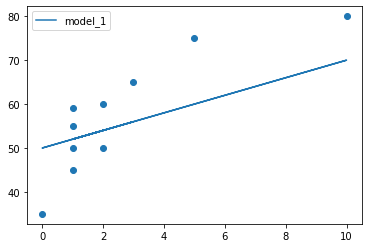

In [4]:
a = 2
b = 50
plt.scatter(X[1,:], y)
# y = a*x + b #
plt.plot(X[1, :], a*X[1, :] + b, label="model_1")
#plt.plot(X[1, :], 2*a*X[1, :] + 50, label="model_2")
plt.legend(loc="best")

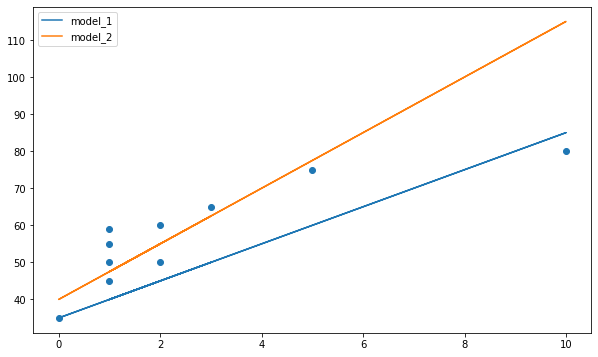

In [5]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5, label="model_1")
plt.plot(X[1], 40*X[0] + X[1]*7.5, label="model_2")
plt.legend(loc='best')

# mse - mean squared error
# mae - mean absolute error

In [6]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [7]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

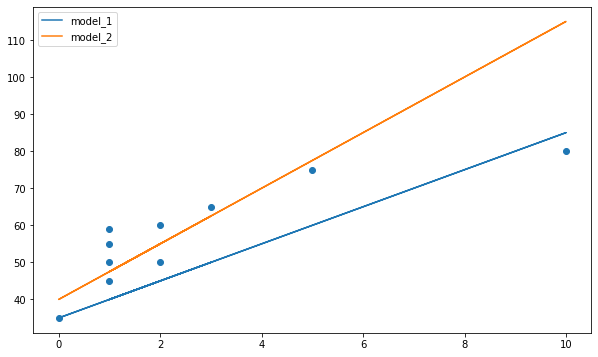

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label="model_1")
plt.plot(X[1], y_pred2, label="model_2")
plt.legend(loc="best")

In [10]:
# 1 - голубая
# 2 - оранжевая

In [11]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [12]:
# Никогда не использовать
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

err1, err2

(9.4, -2.1)

In [13]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [14]:
mae_1, mae_2

(10.4, 7.9)

In [15]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

# np.mean(y - np.mean(y)) = дисперсия = std**2

In [16]:
mse_1, mse_2

(143.6, 151.35)

In [17]:
np.mean([1, 2, 3, 4, 5]), np.mean([1, 2, 3, 4, 50])

(3.0, 12.0)

In [18]:
np.median([1, 2, 3, 4, 5]), np.median([1, 2, 3, 4, 500])

(3.0, 3.0)

__Вывод__:
* MSE - если есть выбросы, и они для вас важны (важны при использовании модели)
* MAE - если выбросы не важны, модель должна работать хорошо на большинстве объектов

Метод наименьших квадратов

In [19]:
X.shape

(2, 10)

In [20]:
X.T.shape

(10, 2)

In [21]:
# X = 1e6 x 1e5

In [22]:
# только для MSE
# ~ d**3
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

In [23]:
# наблюдения, параметры, МНК: наблюдений >> параметров
# наблюдений << параметров. Пример: 

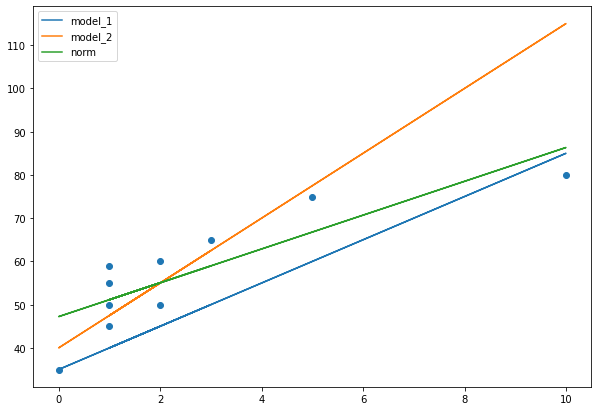

In [24]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label="model_1")
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5, label="model_2")
plt.plot(X[1], W[0] + W[1] * X[1], label="norm")
plt.legend()

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
y_pred_norm = W[0] + W[1] * X[1]
calc_mse(y, y_pred_norm)

45.93749999999999

In [27]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [28]:
calc_mae(y, y_pred1)

10.4

In [29]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [30]:
# RMSE - root mean squared error
np.sqrt(calc_mse(y, y_pred3))

6.777720855862979

In [31]:
calc_mae(y, y_pred3)

6.182142857142858

In [32]:
mse_old = 10.32
mse_new = 10.3199999

delta = 0.1

Градиентный спуск

np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)

(w*x - y)**2

2*z`

w_1, w_2, ..., w_k: 2*x*(w*x - y)
w_0: 2*(w - y)

In [33]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [34]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [35]:
W[0] - g

47.232143060499986

### Домашнее задание

1. Подберите скорость обучения (alpha) и количество итераций:

In [36]:
n = X.shape[1]
W = np.array([1, 0.5])

In [37]:
alpha_list = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

In [38]:
mse_list = []
alpha_error_list = []
for alpha_ in alpha_list:
    for i in range(1500):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for ii in range(W.shape[0]):
            W[ii] -= alpha_ * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        mse_list.append(err)
    print(f'средняя ошибка mse при alpha {alpha_} равняется {sum(mse_list)/len(mse_list)}')
    alpha_error_list.append([alpha_, sum(mse_list)/len(mse_list)])
    mse_list = []
    
    

средняя ошибка mse при alpha 1e-10 равняется 3173.1404256125807
средняя ошибка mse при alpha 1e-09 равняется 3173.035098011073
средняя ошибка mse при alpha 1e-08 равняется 3171.9821684823614
средняя ошибка mse при alpha 1e-07 равняется 3161.4874350639766
средняя ошибка mse при alpha 1e-06 равняется 3059.9112308011386
средняя ошибка mse при alpha 1e-05 равняется 2310.8396092076764
средняя ошибка mse при alpha 0.0001 равняется 997.8660416940417
средняя ошибка mse при alpha 0.001 равняется 272.5916876588098
средняя ошибка mse при alpha 0.01 равняется 46.98843706810206


In [39]:
# Получаем список из альфа и средних значений ошибок при данном альфа
alpha_error_list_np = np.array(alpha_error_list)
alpha_error_list_np

array([[1.00000000e-10, 3.17314043e+03],
       [1.00000000e-09, 3.17303510e+03],
       [1.00000000e-08, 3.17198217e+03],
       [1.00000000e-07, 3.16148744e+03],
       [1.00000000e-06, 3.05991123e+03],
       [1.00000000e-05, 2.31083961e+03],
       [1.00000000e-04, 9.97866042e+02],
       [1.00000000e-03, 2.72591688e+02],
       [1.00000000e-02, 4.69884371e+01]])

In [40]:
# Находим alpha, при которой mse минимальна
alpha_best = alpha_error_list_np[np.where(alpha_error_list_np[:, 1] == alpha_error_list_np[:, 1].min())][0][0]
alpha_best

0.01

In [41]:
n = X.shape[1]
W = np.array([1, 0.5])
errors_list = []
for i in range(1500):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha_best * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    errors_list.append([i, err])
# print(errors_list)

for i in range(len(errors_list)):
    if errors_list[i+1][1] - errors_list[i][1] >= -0.0001:
        iteration_number = errors_list[i+1][0]
        print(iteration_number)
        break
#         print(errors_list[i+1])
    

589


In [42]:
# Ответ
print(f'Скорость обучения альфа равна {alpha_best}, а количество итераций равно {iteration_number}')

Скорость обучения альфа равна 0.01, а количество итераций равно 589


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [43]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [47.23213601  3.91071555] 45.93750000002521
100 [47.23213601  3.91071555] 45.93750000002518
200 [47.23213601  3.91071555] 45.93750000002518
300 [47.23213601  3.91071555] 45.93750000002519
400 [47.23213601  3.91071555] 45.937500000025196
500 [47.23213601  3.91071555] 45.937500000025196
600 [47.23213601  3.91071555] 45.937500000025196
700 [47.23213601  3.91071555] 45.937500000025196
800 [47.23213601  3.91071555] 45.9375000000252
900 [47.23213601  3.91071555] 45.93750000002518
